# 1. Define genetic algorithm suite

In [1]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

from src.prediction.gpr_model_trainer import GPRModelTrainer
from src.prediction.etr_model_trainer import EtrModelTrainer

from src.ga.chromosome.vent_hole import VentHole

from src.ga.gene.shape.shape_variations import (
    ray_params,
    double_parabolic_params,
    circle_params,
    donut_params,
    hole_params,
    trapezoid_params,
    triangle_params,
    wing_params,
)
from src.ga.gene.pattern.pattern_variations import (
    grid_params
)

from src.ga.ga_pipeline import GAPipeline

from src.ga.p1_initialize.init_vent import VentInitializer
from src.ga.p2_fitness.vent_fitness import Criterion, VentFitnessCalculator
from src.ga.p3_select.behaviors import (
    TournamentSelectionFilter,
    ElitismSelectionFilter,
    RouletteWheelSelectionFilter,
)
from src.ga.p4_crossover.behaviors import (
    OnePointCrossover,
    TwoPointCrossover,
    UniformCrossover,
)

# ----------------- Define the GA CONSTANTS -----------------
# 1. Define the criteria weights, w1, w2, w3
CRITERIA_WEIGHT = (1, 1.4, 0.4)

# 2. Define the criteria with direction, min, and max values
DRAG_CRITERION: Criterion = ("lower", 0.2, 0.3)  # Lower is better, range 0.2 to 0.3
DRAG_STD_CRITERION: Criterion = ("lower", 0, 0.05)  # Lower is better, range 0 to 0.05

AVG_TEMP_CRITERION: Criterion = (
    "lower",
    250,
    450,
)  # Lower is better, range 250K to 400K
AVG_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

MAX_TEMP_CRITERION: Criterion = (
    "lower",
    300,
    500,
)  # Lower is better, range 300K to 500K
MAX_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

# 3. Define the grid parameters
GRID_SCALE = 1
# Scaling factor

GRID_RESOLUTION = 2
# Grid resolution

GRID_WIDTH = 100
# Grid width, ~= canvas size

GRID_BOUND = (
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
)
# ----------------- Define the GA MODELS -----------------

gpr_kernel = ConstantKernel(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))
gpr_model_trainer = GPRModelTrainer(
    gpr_kernel=gpr_kernel,
    gpr_drag_config=(10, 1e-5),
    gpr_max_temp_config=(10, 1e-3),
    gpr_avg_temp_config=(10, 1e-3),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

etr_model_trainer = EtrModelTrainer(
    etr_drag_config=(100, 42),
    etr_max_temp_config=(100, 42),
    etr_avg_temp_config=(100, 42),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

# ----------------- Define the GA PIPELINES -----------------
suite = GAPipeline[VentHole](
    suite_name="exp/tournament/config",
    suite_max_count=50,
    suite_min_population=20,
    suite_min_chromosome=40,
    crossover_behavior=UniformCrossover(),
    selector_behavior=TournamentSelectionFilter(tournament_size=4),
    fitness_calculator=VentFitnessCalculator(
        model_trainer_tuple=(
            gpr_model_trainer,
            etr_model_trainer,
            etr_model_trainer,
        ),
        criteria_weight_list=CRITERIA_WEIGHT,
        drag_criterion=DRAG_CRITERION,
        drag_std_criterion=DRAG_STD_CRITERION,
        avg_temp_criterion=AVG_TEMP_CRITERION,
        avg_temp_std_criterion=AVG_TEMP_STD_CRITERION,
        max_temp_criterion=MAX_TEMP_CRITERION,
        max_temp_std_criterion=MAX_TEMP_STD_CRITERION,
    ),
    immediate_exit_condition=lambda x: x[0] >= 0.85 and x[1] >= 0.85,
    mutation_probability=0.015,
    population_initializer=VentInitializer(
        population_size=1000,
        grid_scale=GRID_SCALE,
        grid_resolution=GRID_RESOLUTION,
        pattern_bound=GRID_BOUND,
        pattern_gene_pool=[grid_params],
        shape_gene_pool=[
            ray_params,
                double_parabolic_params,
                circle_params,
                donut_params,
                hole_params,
                trapezoid_params,
                triangle_params,
                wing_params,
        ],
    ),
)

[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.j

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: C

-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
--------------------------------------------------------------------------------
| [ModelTrainer]: Optimal feature count founded: 151 for desired variance: 0.9 |
--------------------------------------------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
-------

# 2. Run genetic algorithm

매번 run을 실행할 때마다, 개체 수, 격자 해상도 등에 따라 다르지만, **수행 시간이 길 수 있습니다.**

In [2]:
suite.run()

----------------------------------------------------------------------------------------------------
>> GA started
----------------------------------------------------------------------------------------------------
Suite_name: exp/tournament/config
Suite_max_count: 50
Suite_min_population: 20
Suite_min_chromosome: 40
Immediate_exit: False
Generation: 0
Initial_population: 1000
Population_count: 0
Unique_population_count: 0
Mutation_count: 0
Mutation_probability: 0.015
Fitness_calculator: GPR
Selector_behavior: TournamentSelection
Crossover_behavior: Uniform Crossover
Population_initializer: VentInitializer
----------------------------------------------------------------------------------------------------
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/biased_fi

# 3. Plot fitness result

- `biased_fitness`: 가중치가 적용된 fitness, $w1 * p1 + w2 * p2+ ...$
- `fitness`: 가중치 없이 계산된 fitness, $p1 + p2 + ...$

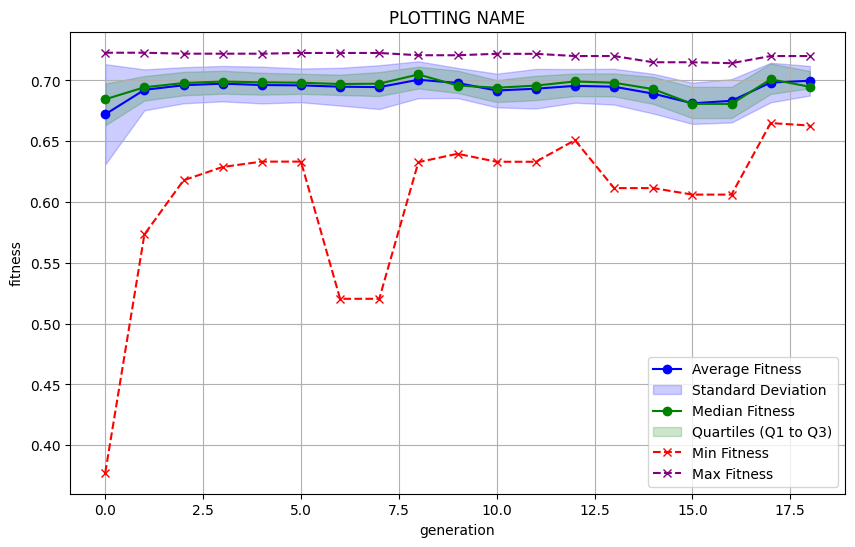

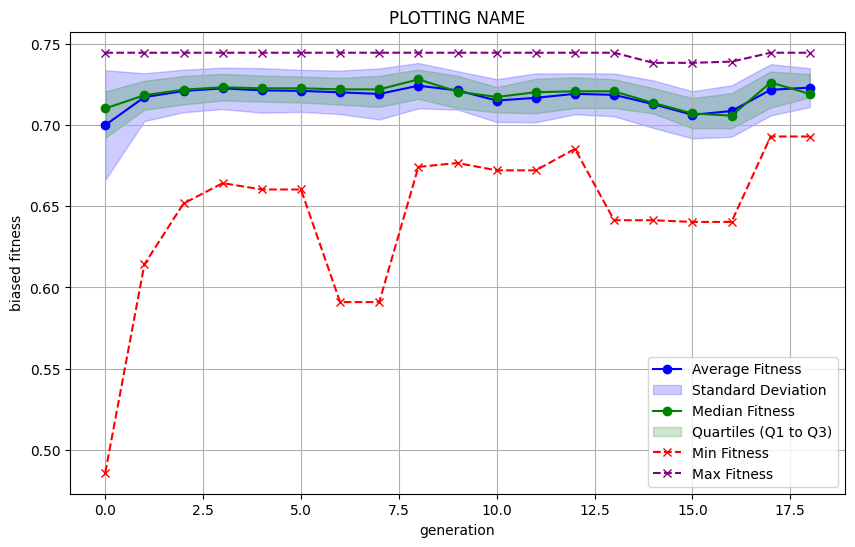

In [3]:
suite.evolution_storage.plot_fitness(
    storage="fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="fitness",
)
suite.evolution_storage.plot_fitness(
    storage="biased_fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="biased fitness",
)

# 4. Analyze final population(unique)

1. population은 최종 선택된 개체만 남게 됩니다.
2. `population[i]`는 각 VentHole 유전자(Chromosome)이 도출됩니다.
3. `population[i].pattern_matrix` 에는 pattern에 격자화된 point vector가 존재합니다.
3. `population[i].gene_tuple` 을 통해 최종적인 유전자에 접근할 수 있습니다.


--------------------------------------------------
label: VentHole Chromosome_137: ['RayShape_314', 'GridStrictTransformation_154']
predict: (0.2904868358410495, 373.49610179999996, 456.82410169999986)
biased_fitness: 0.7170107255895053, fitness: 0.6935306240895057
shape parameter:
parameter_list: [ upper_slope: 2.0340184752286294, nose_point: 2.515860064927751, lower_coefficient: 3.4246693101317636, lower_x-intercept: 1.0623046194973191, lower_y-intercept: 1.0251617272332485, ]
pattern parameter:
parameter_list: [ dx: 5.8334561707610915, dy: 5.382779210760358, ]


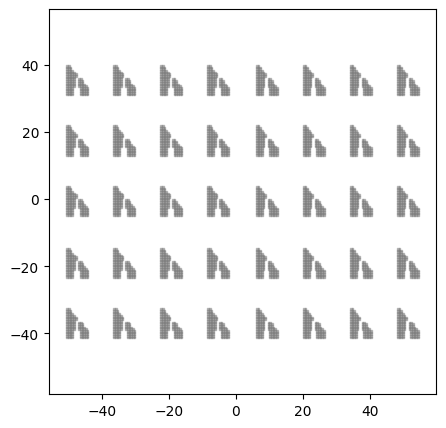

--------------------------------------------------
label: VentHole Chromosome_137: ['RayShape_137', 'GridStrictTransformation_314']
predict: (0.29159505685620957, 373.3955104999998, 455.4797827999999)
biased_fitness: 0.709321292337906, fitness: 0.6896729649379059
shape parameter:
parameter_list: [ upper_slope: 2.0340184752286294, nose_point: 2.515860064927751, lower_coefficient: 3.4246693101317636, lower_x-intercept: 1.0623046194973191, lower_y-intercept: 1.0251617272332485, ]
pattern parameter:
parameter_list: [ dx: 5.8334561707610915, dy: 5.382779210760358, ]


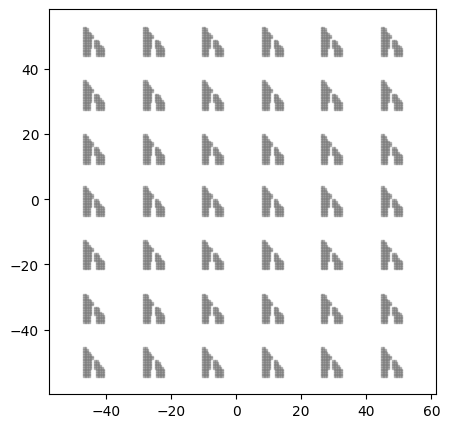

--------------------------------------------------
label: VentHole Chromosome_326: ['RayShape_825', 'GridStrictTransformation_132']
predict: (0.290951965253758, 373.6493918, 456.5726218)
biased_fitness: 0.7117893612624201, fitness: 0.6893702794624201
shape parameter:
parameter_list: [ upper_slope: 2.0340184752286294, nose_point: 2.515860064927751, lower_coefficient: 3.4246693101317636, lower_x-intercept: 1.0623046194973191, lower_y-intercept: 1.0251617272332485, ]
pattern parameter:
parameter_list: [ dx: 7.057721406169899, dy: 4.040311694945133, ]


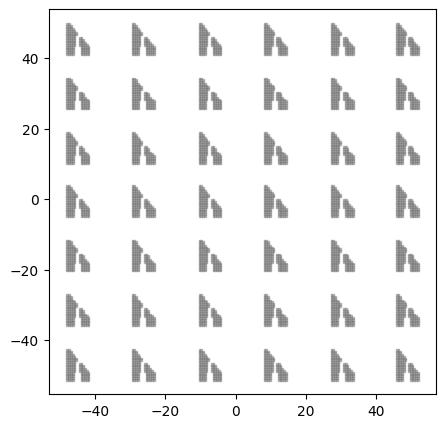

--------------------------------------------------
label: VentHole Chromosome_841: ['RayShape_326', 'GridStrictTransformation_374']
predict: (0.29230593024822227, 374.0012467999999, 455.23393260000006)
biased_fitness: 0.6984641047177779, fitness: 0.6807648005177774
shape parameter:
parameter_list: [ upper_slope: 2.0340184752286294, nose_point: 2.515860064927751, lower_coefficient: 3.4246693101317636, lower_x-intercept: 1.0623046194973191, lower_y-intercept: 1.0251617272332485, ]
pattern parameter:
parameter_list: [ dx: 5.8334561707610915, dy: 5.382779210760358, ]


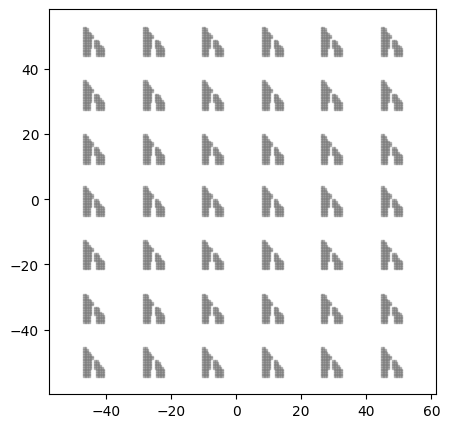

--------------------------------------------------
label: VentHole Chromosome_890: ['CircleShape_326', 'GridStrictTransformation_154']
predict: (0.2905866400318351, 373.1884886, 454.7229112)
biased_fitness: 0.7223683570816488, fitness: 0.7045766006816488
shape parameter:
parameter_list: [ r: 1.6998853296904328, ]
pattern parameter:
parameter_list: [ dx: 5.8334561707610915, dy: 4.040311694945133, ]


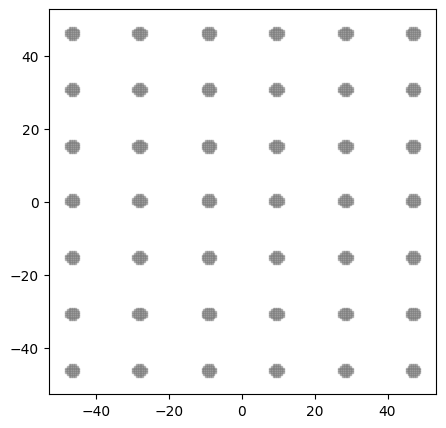

--------------------------------------------------
label: VentHole Chromosome_154: ['RayShape_154', 'GridStrictTransformation_314']
predict: (0.2902454327591022, 373.4622323000001, 457.09456179999984)
biased_fitness: 0.7191209227089777, fitness: 0.6947617019089783
shape parameter:
parameter_list: [ upper_slope: 2.0340184752286294, nose_point: 2.515860064927751, lower_coefficient: 3.4246693101317636, lower_x-intercept: 1.0623046194973191, lower_y-intercept: 1.0251617272332485, ]
pattern parameter:
parameter_list: [ dx: 4.200053611267892, dy: 4.040311694945133, ]


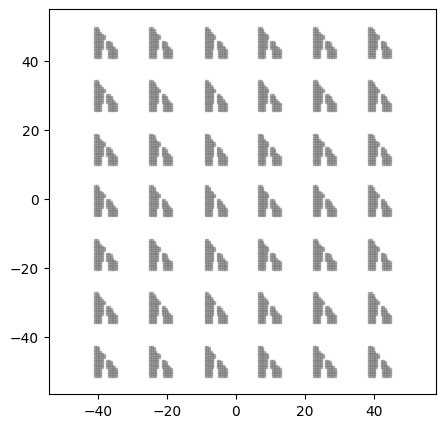

--------------------------------------------------
label: VentHole Chromosome_88: ['TriangleShape_137', 'GridStrictTransformation_691']
predict: (0.2915054692183212, 373.8260542, 456.3064009999999)
biased_fitness: 0.705550126416788, fitness: 0.6842830318167884
shape parameter:
parameter_list: [ l: 8.185429409739077, ]
pattern parameter:
parameter_list: [ dx: 4.200053611267892, dy: 4.040311694945133, ]


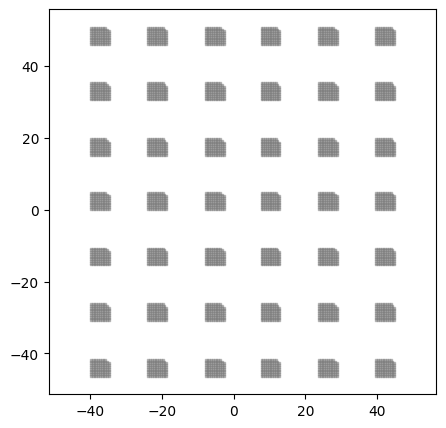

--------------------------------------------------
label: VentHole Chromosome_137: ['TriangleShape_88', 'GridStrictTransformation_282']
predict: (0.28917094084019057, 372.9504061000001, 457.8898774)
biased_fitness: 0.7318579940980934, fitness: 0.7040891740980937
shape parameter:
parameter_list: [ l: 8.185429409739077, ]
pattern parameter:
parameter_list: [ dx: 5.8334561707610915, dy: 5.382779210760358, ]


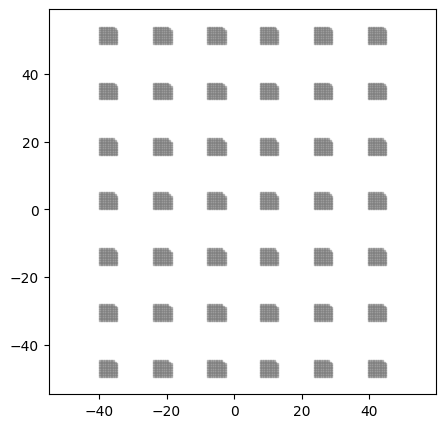

--------------------------------------------------
label: VentHole Chromosome_825: ['RayShape_825', 'GridStrictTransformation_282']
predict: (0.29230593024822227, 374.0012467999999, 455.23393260000006)
biased_fitness: 0.6984641047177779, fitness: 0.6807648005177774
shape parameter:
parameter_list: [ upper_slope: 2.0340184752286294, nose_point: 2.515860064927751, lower_coefficient: 3.4246693101317636, lower_x-intercept: 1.0623046194973191, lower_y-intercept: 1.0251617272332485, ]
pattern parameter:
parameter_list: [ dx: 5.8334561707610915, dy: 5.382779210760358, ]


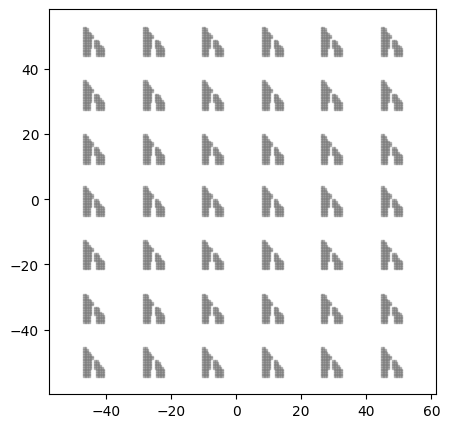

--------------------------------------------------
label: VentHole Chromosome_137: ['CircleShape_358', 'GridStrictTransformation_825']
predict: (0.2899126612283913, 373.2441077, 458.1418517999997)
biased_fitness: 0.7218809302160875, fitness: 0.6939435902160883
shape parameter:
parameter_list: [ r: 2.2138614764866027, ]
pattern parameter:
parameter_list: [ dx: 5.8334561707610915, dy: 5.382779210760358, ]


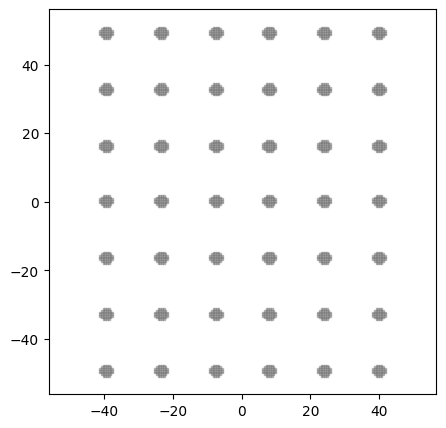

--------------------------------------------------
label: VentHole Chromosome_341: ['CircleShape_137', 'GridStrictTransformation_825']
predict: (0.2888094973802007, 373.05455229999984, 457.97305169999987)
biased_fitness: 0.7345770566979944, fitness: 0.7067670061979946
shape parameter:
parameter_list: [ r: 2.2138614764866027, ]
pattern parameter:
parameter_list: [ dx: 5.8334561707610915, dy: 5.382779210760358, ]


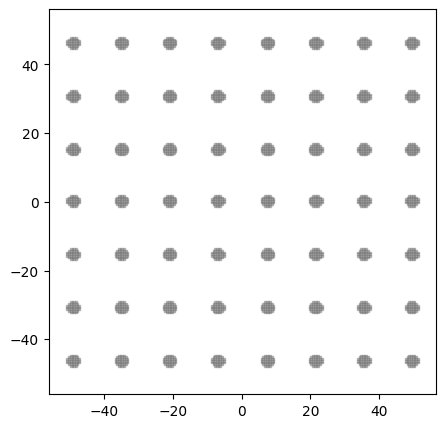

--------------------------------------------------
label: VentHole Chromosome_154: ['CircleShape_503', 'GridStrictTransformation_326']
predict: (0.29071332197298894, 373.27870749999994, 460.1813586999999)
biased_fitness: 0.709553110370111, fitness: 0.6755664492701112
shape parameter:
parameter_list: [ r: 1.6998853296904328, ]
pattern parameter:
parameter_list: [ dx: 4.200053611267892, dy: 4.040311694945133, ]


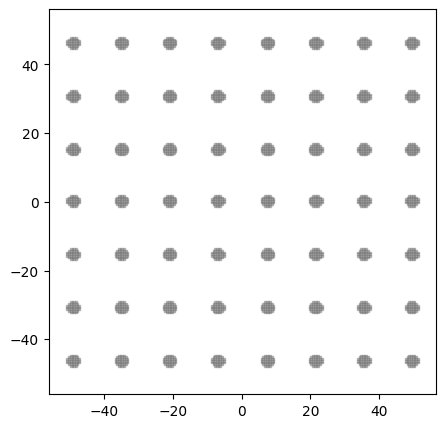

--------------------------------------------------
label: VentHole Chromosome_788: ['CircleShape_137', 'GridStrictTransformation_589']
predict: (0.28973422286860684, 373.2185155999999, 456.8209141)
biased_fitness: 0.7264863339139324, fitness: 0.7024606228139322
shape parameter:
parameter_list: [ r: 1.6998853296904328, ]
pattern parameter:
parameter_list: [ dx: 7.057721406169899, dy: 4.040311694945133, ]


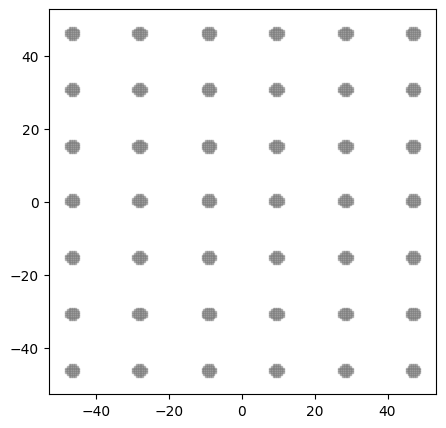

--------------------------------------------------
label: VentHole Chromosome_314: ['CircleShape_282', 'GridStrictTransformation_788']
predict: (0.29155910411729935, 373.4602279, 455.61717440000007)
biased_fitness: 0.7089530147270062, fitness: 0.6890219473270061
shape parameter:
parameter_list: [ r: 2.2138614764866027, ]
pattern parameter:
parameter_list: [ dx: 7.057721406169899, dy: 4.040311694945133, ]


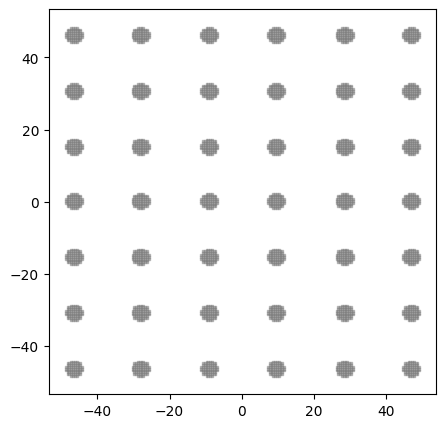

--------------------------------------------------
label: VentHole Chromosome_788: ['RayShape_841', 'GridStrictTransformation_374']
predict: (0.2896735692917938, 373.1229983999998, 457.34577369999994)
biased_fitness: 0.7267117708820636, fitness: 0.7009204465820634
shape parameter:
parameter_list: [ upper_slope: 2.8455551139365793, nose_point: 1.2930386558098739, lower_coefficient: 3.9837460626648964, lower_x-intercept: 1.5148478147233653, lower_y-intercept: 3.0000032514968735, ]
pattern parameter:
parameter_list: [ dx: 4.200053611267892, dy: 4.040311694945133, ]


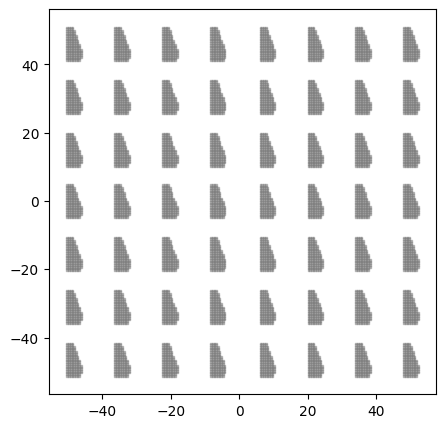

--------------------------------------------------
label: VentHole Chromosome_841: ['RayShape_841', 'GridStrictTransformation_137']
predict: (0.2905693161869092, 373.1212771000001, 456.9441296999999)
biased_fitness: 0.7185696390309075, fitness: 0.6939798041309081
shape parameter:
parameter_list: [ upper_slope: 2.0340184752286294, nose_point: 2.515860064927751, lower_coefficient: 3.4246693101317636, lower_x-intercept: 1.0623046194973191, lower_y-intercept: 1.0251617272332485, ]
pattern parameter:
parameter_list: [ dx: 5.8334561707610915, dy: 5.382779210760358, ]


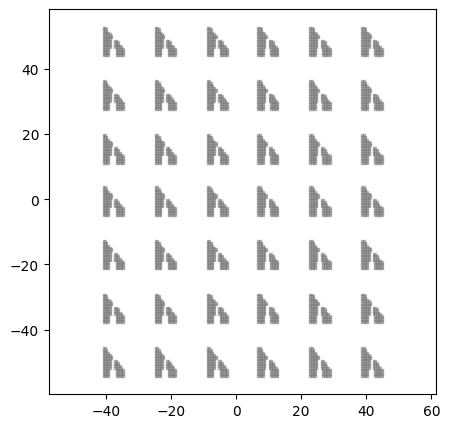

--------------------------------------------------
label: VentHole Chromosome_154: ['CircleShape_788', 'GridStrictTransformation_773']
predict: (0.2890603054737717, 373.54755910000006, 455.42703949999986)
biased_fitness: 0.7337099525622827, fitness: 0.7145239522622832
shape parameter:
parameter_list: [ r: 1.6998853296904328, ]
pattern parameter:
parameter_list: [ dx: 5.8334561707610915, dy: 5.382779210760358, ]


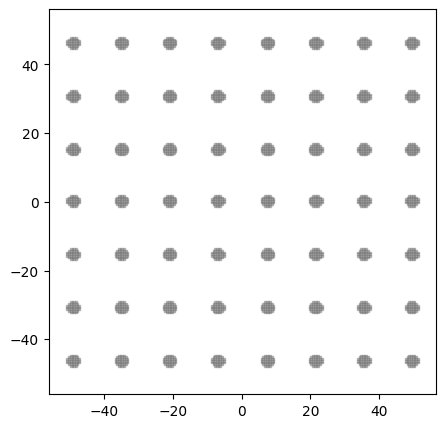

--------------------------------------------------
label: VentHole Chromosome_773: ['CircleShape_314', 'GridStrictTransformation_788']
predict: (0.28976449528690207, 373.41633859999996, 456.8856306999998)
biased_fitness: 0.7246694155309797, fitness: 0.7008452006309803
shape parameter:
parameter_list: [ r: 2.2138614764866027, ]
pattern parameter:
parameter_list: [ dx: 5.8334561707610915, dy: 5.382779210760358, ]


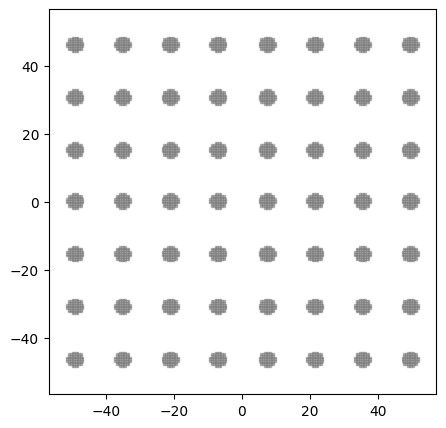

--------------------------------------------------
label: VentHole Chromosome_132: ['RayShape_890', 'GridStrictTransformation_374']
predict: (0.2907389424630282, 372.76307940000015, 457.00001139999983)
biased_fitness: 0.7192689967697168, fitness: 0.6937951213697177
shape parameter:
parameter_list: [ upper_slope: 1.1358368476423801, nose_point: 1.2930386558098739, lower_coefficient: 3.9837460626648964, lower_x-intercept: 1.5148478147233653, lower_y-intercept: 1.155720777458792, ]
pattern parameter:
parameter_list: [ dx: 5.8334561707610915, dy: 5.382779210760358, ]


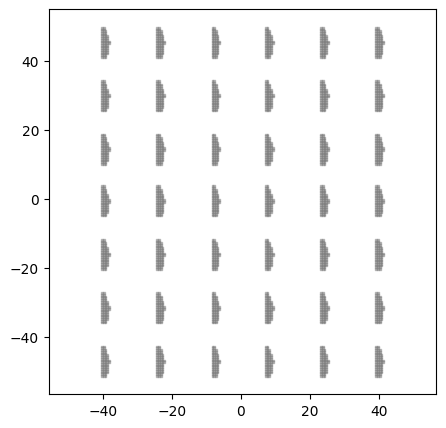

--------------------------------------------------
label: VentHole Chromosome_314: ['RayShape_132', 'GridStrictTransformation_773']
predict: (0.29211279458587835, 373.17213309999994, 460.02083819999984)
biased_fitness: 0.696625446041217, fitness: 0.6629071976412174
shape parameter:
parameter_list: [ upper_slope: 1.1358368476423801, nose_point: 1.2930386558098739, lower_coefficient: 3.9837460626648964, lower_x-intercept: 1.5148478147233653, lower_y-intercept: 1.155720777458792, ]
pattern parameter:
parameter_list: [ dx: 4.200053611267892, dy: 4.040311694945133, ]


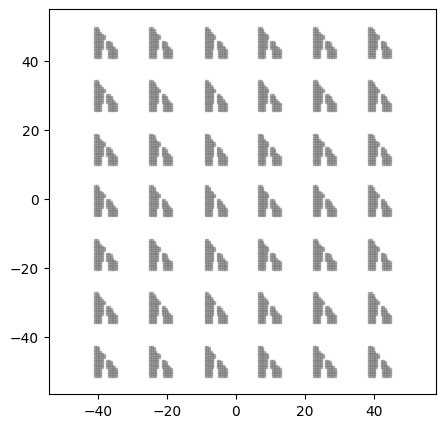

--------------------------------------------------
label: VentHole Chromosome_137: ['TriangleShape_137', 'GridStrictTransformation_841']
predict: (0.2927103114650549, 373.2765060999999, 457.7130720000001)
biased_fitness: 0.6945351986494516, fitness: 0.6679489948494509
shape parameter:
parameter_list: [ l: 8.185429409739077, ]
pattern parameter:
parameter_list: [ dx: 5.8334561707610915, dy: 4.040311694945133, ]


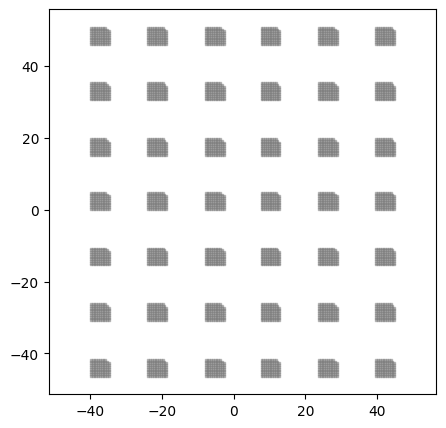

--------------------------------------------------
label: VentHole Chromosome_358: ['RayShape_314', 'GridStrictTransformation_305']
predict: (0.2898611128640882, 372.9960051999999, 455.84465359999973)
biased_fitness: 0.728727527759119, fitness: 0.7071855773591196
shape parameter:
parameter_list: [ upper_slope: 1.1358368476423801, nose_point: 1.2930386558098739, lower_coefficient: 3.9837460626648964, lower_x-intercept: 1.5148478147233653, lower_y-intercept: 1.155720777458792, ]
pattern parameter:
parameter_list: [ dx: 5.8334561707610915, dy: 4.040311694945133, ]


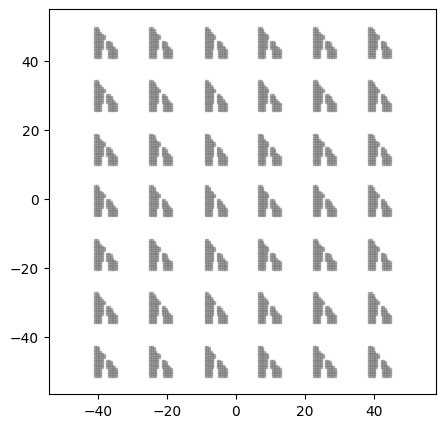

--------------------------------------------------
label: VentHole Chromosome_326: ['RayShape_890', 'GridStrictTransformation_137']
predict: (0.29066992374645206, 373.4172837, 456.2281080999999)
biased_fitness: 0.7169235604354797, fitness: 0.69507380353548
shape parameter:
parameter_list: [ upper_slope: 2.0340184752286294, nose_point: 2.515860064927751, lower_coefficient: 3.4246693101317636, lower_x-intercept: 1.0623046194973191, lower_y-intercept: 1.0251617272332485, ]
pattern parameter:
parameter_list: [ dx: 5.8334561707610915, dy: 6.368997638791267, ]


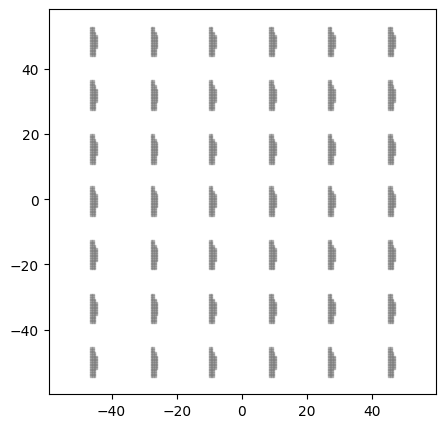

--------------------------------------------------
label: VentHole Chromosome_137: ['CircleShape_326', 'GridStrictTransformation_326']
predict: (0.28976449528690207, 373.41633859999996, 456.8856306999998)
biased_fitness: 0.7246694155309797, fitness: 0.7008452006309803
shape parameter:
parameter_list: [ r: 1.6998853296904328, ]
pattern parameter:
parameter_list: [ dx: 5.8334561707610915, dy: 6.368997638791267, ]


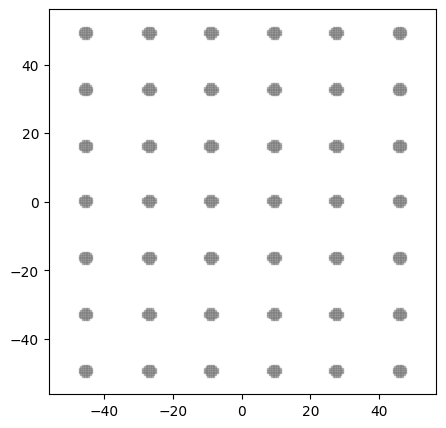

--------------------------------------------------
label: VentHole Chromosome_132: ['CircleShape_314', 'GridStrictTransformation_326']
predict: (0.2916641163294549, 372.55242690000006, 459.4535972000001)
biased_fitness: 0.7065846540054506, fitness: 0.6733287162054503
shape parameter:
parameter_list: [ r: 2.2138614764866027, ]
pattern parameter:
parameter_list: [ dx: 4.200053611267892, dy: 4.040311694945133, ]


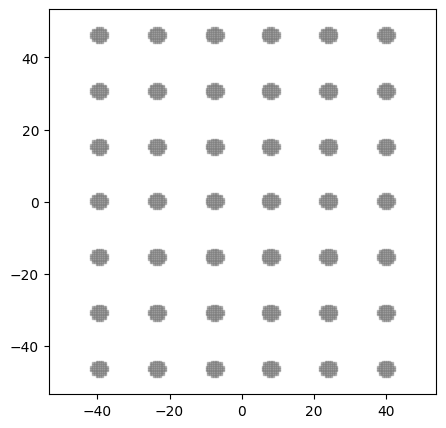

In [4]:
from src.grid.visualize_points import visualize_points


for pop in suite.unique_population:
    print("-" * 50)
    print(f"label: {pop.label}")
    print(f"predict: {pop.fitness_pure_result}")
    print(f"biased_fitness: {pop.biased_fitness}, fitness: {pop.fitness}")

    shape, pattern = pop.gene_tuple
    print("shape parameter:")
    shape.print_parameter_info()
    print("pattern parameter:")
    pattern.print_parameter_info()

    visualize_points(
        pop.pattern.pattern_matrix,
        pop.pattern.pattern_unit.grid.k,
        fig_size=(5, 5),
    )